In [1]:
import pandas as pd
df = pd.read_csv('../data/ozone/ozone2.csv')
df.head()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
0,41.00000,0,190.000000,7.4,67,5,1
1,36.00000,0,118.000000,8.0,72,5,2
2,12.00000,0,149.000000,12.6,74,5,3
3,18.00000,0,313.000000,11.5,62,5,4
4,42.12931,1,185.931507,14.3,56,5,5


In [2]:
df.columns

Index(['Ozone', 'Result', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [3]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df[['Ozone']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [6]:
import numpy as np
X_train = np.array(X_train_scaled,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)
X_test = np.array(X_test_scaled,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [7]:
import torch
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

In [8]:
import torch.nn as nn
input_dim = X_train.shape[1]
output_dim = 64
model = nn.Sequential(
    nn.Linear(input_dim, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)
print(model)
print(model[6].weight)
print(model[6].bias)

Sequential(
  (0): Linear(in_features=3, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Parameter containing:
tensor([[ 0.5230, -0.5247,  0.5542]], requires_grad=True)
Parameter containing:
tensor([-0.3552], requires_grad=True)


In [9]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
loss_list = []
iteration_number = 5000
for iteration in range(iteration_number):
    optimizer.zero_grad()
    results = model(inputs)
    loss = mse(results, targets)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 2810.473388671875
epoch 50, loss 388.2024230957031
epoch 100, loss 334.0116882324219
epoch 150, loss 326.26971435546875
epoch 200, loss 320.0820617675781
epoch 250, loss 315.390380859375
epoch 300, loss 311.8210144042969
epoch 350, loss 308.61846923828125
epoch 400, loss 305.7281188964844
epoch 450, loss 303.2655944824219
epoch 500, loss 299.71038818359375
epoch 550, loss 292.0369567871094
epoch 600, loss 271.6872253417969
epoch 650, loss 240.67918395996094
epoch 700, loss 205.5162811279297
epoch 750, loss 179.2743682861328
epoch 800, loss 160.3170928955078
epoch 850, loss 151.8231201171875
epoch 900, loss 141.7598419189453
epoch 950, loss 133.0265350341797
epoch 1000, loss 127.30545043945312
epoch 1050, loss 122.79618835449219
epoch 1100, loss 119.6178970336914
epoch 1150, loss 116.70162963867188
epoch 1200, loss 111.49346160888672
epoch 1250, loss 98.31196594238281
epoch 1300, loss 90.00506591796875
epoch 1350, loss 81.99449157714844
epoch 1400, loss 79.53678894042969
e

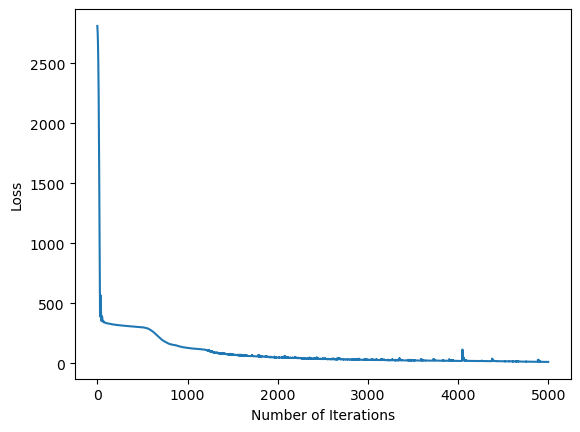

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [11]:
input_x_test = torch.from_numpy(X_test)
predicted = model(input_x_test.float()).data.numpy()
predicted[0:5]

array([[53.43584 ],
       [46.479042],
       [82.864685],
       [58.680634],
       [43.385193]], dtype=float32)

In [12]:
loss.data.item()

10.653112411499023

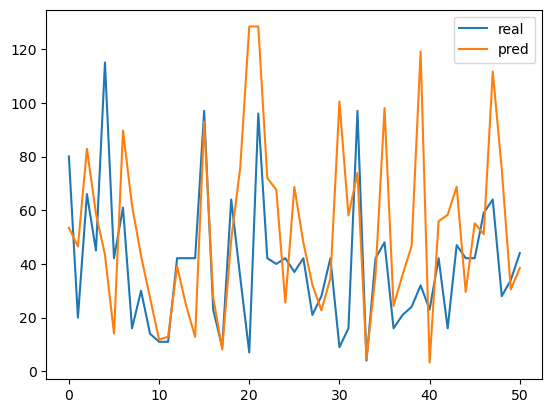

In [13]:
X_test = torch.from_numpy(X_test)
plt.plot(y_test, label='real')
plt.plot(model(X_test).detach().numpy(), label='pred')
plt.legend()
plt.show()